In [1]:
#import needed libraries
#BytesIO,ZipFile----->importing
from io import BytesIO
#convert data to understandable format
from zipfile import ZipFile
#extraction of zip file
import matplotlib.pyplot as plt
#visualization
%matplotlib inline
#window
import pandas as pd
import numpy as np

In [2]:
#ZipFile('file_name.zip').extractall('.')----->extract all the files

z=ZipFile('names.zip').extractall(".")
#the .---->path where the file is extracted

In [3]:
z

In [4]:
#combining all files into same dataframe

In [4]:
years=[]

for year in range(1880,2021):
    years.append(pd.read_csv(f'yob{year}.txt',names=['Name','Gender','Babies']))
    years[-1]['Year']=year 
 
 


In [5]:
df=pd.concat(years)
df.head()



,Name,Gender,Babies,Year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
df_pivot=df.pivot_table(index=['Year'],columns=['Gender'],values=['Babies'],aggfunc='sum')
df_pivot

Babies         
Gender        F        M
Year                    
1880      90994   110490
1881      91953   100738
1882     107847   113686
1883     112319   104625
1884     129019   114442
...         ...      ...
2016    1768360  1893917
2017    1722140  1846154
2018    1695654  1810309
2019    1670419  1785527
2020    1598836  1706423

[141 rows x 2 columns]

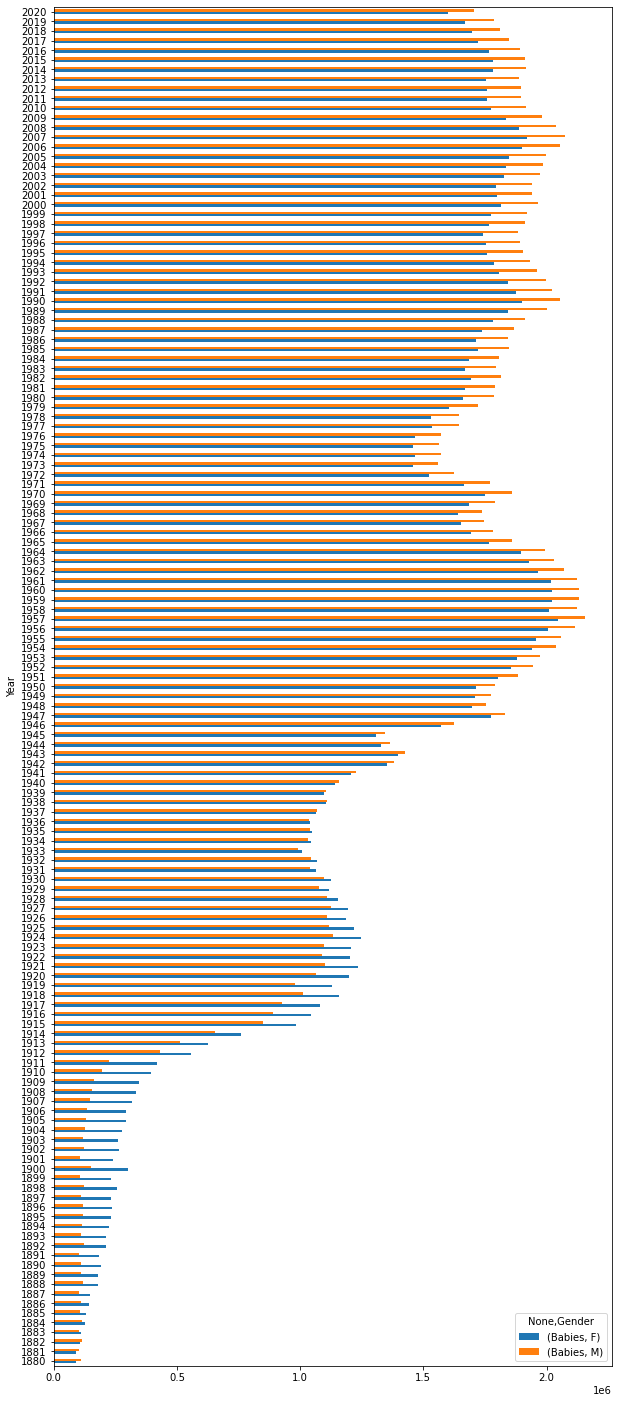

In [8]:

plt.Figure(figsize=(15,10))
df_pivot.plot(kind='barh',figsize=(10,25))
plt.show()


In [10]:
#male and female count

df_grouped=df.groupby(['Year','Gender'])['Babies'].sum().reset_index()
df_grouped



,Year,Gender,Babies
0,1880,F,90994
1,1880,M,110490
2,1881,F,91953
3,1881,M,100738
4,1882,F,107847
...,...,...,...
277,2018,M,1810309
278,2019,F,1670419
279,2019,M,1785527
280,2020,F,1598836


In [11]:
# Displaying the top 100 baby names
sort_baby_names=df.sort_values(by='Babies',ascending=False).reset_index().drop('index',axis=1)
sort_baby_names
sort_baby_names.head(100)
#display head(100)

,Name,Gender,Babies,Year
0,Linda,F,99693,1947
1,Linda,F,96212,1948
2,James,M,94764,1947
3,Michael,M,92718,1957
4,Robert,M,91647,1947
...,...,...,...,...
95,Michael,M,72801,1951
96,James,M,72548,1962
97,Robert,M,72351,1960
98,Mary,F,72176,1922


In [12]:
df_pivot =pd.pivot_table(data=df,index=['Name'], columns=['Gender','Year'], values=['Babies'], aggfunc='sum')
df_pivot

Babies                                               ...              \
Gender       F                                               ...     M         
Year      1880 1881 1882 1883 1884 1885 1886 1887 1888 1889  ...  2011  2012   
Name                                                         ...               
Aaban      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  11.0  11.0   
Aabha      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabid      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabidah    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Aabir      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
Zyvion     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyvon      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyyanna    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zyyon      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   
Zzyzx      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   

                                                     
Gender                                               
Year     2013  2014  2015 2016  2017 2018 2019 2020  
Name                                                 
Aaban    14.0  16.0  15.0  9.0  11.0  7.0  6.0  NaN  
Aabha     NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Aabid     NaN   NaN   NaN  5.0   NaN  6.0  NaN  NaN  
Aabidah   NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Aabir     NaN   NaN   NaN  5.0   NaN  5.0  NaN  NaN  
...       ...   ...   ...  ...   ...  ...  ...  ...  
Zyvion    NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Zyvon     NaN   NaN   7.0  NaN   NaN  NaN  NaN  NaN  
Zyyanna   NaN   NaN   NaN  NaN   NaN  NaN  NaN  NaN  
Zyyon     NaN   6.0   NaN  NaN   NaN  NaN  NaN  NaN  
Zzyzx     NaN   NaN   NaN  NaN   NaN  5.0  NaN  NaN  

[100364 rows x 282 columns]

In [14]:
# Generating popular baby names

top_100_names=sort_baby_names.head(100)
grouped_names=top_100_names[['Name','Babies']].groupby('Name').sum().sort_values(by='Babies',ascending=False)
grouped_names

,Babies
Name,
James,1808522
Michael,1768255
John,1525009
Robert,1467401
David,978056
Linda,441334
Mary,219697
